# Lineární Regrese

Úloha zaměřená na implementaci lineární regrese pomocí metody LSE.

Data reprezentují výsledky zkoušky, konkrétně bodový zisk v závislosti na době studia.

Import knihoven:

In [151]:
import numpy as np
import usu

Načtení dat:

In [152]:
npzfile = np.load('data_02.npz')
npzfile.files


['x0', 'x1']

Přiřazení dat do nezávislé a závislé proměnné:

In [ ]:
x = npzfile['x0']
y = npzfile['x1']
x.shape, y.shape8


((100, 1), (100, 1))

Vykreslení dat:

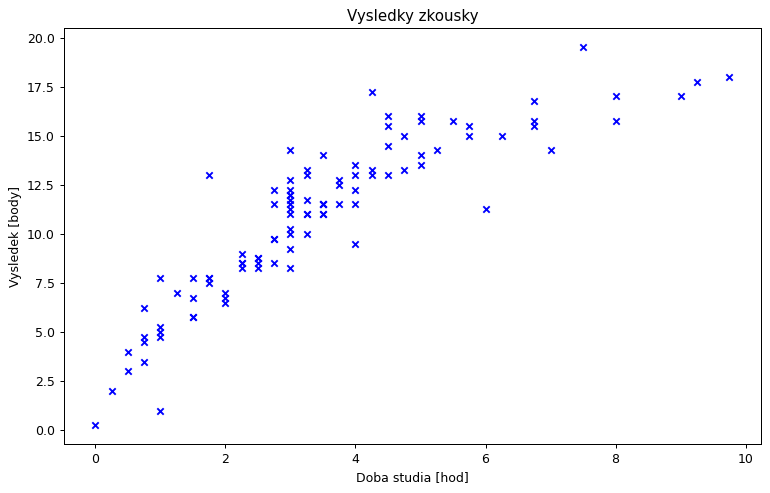

In [154]:
usu.draw(x, y, "Vysledky zkousky", "Doba studia [hod]", "Vysledek [body]")

## LSE (Least-Squares Estimation)


### Odhad parametrů $\theta$ :

$$ \theta = (\tilde{X^T} \tilde{X})^{-1} \tilde{X^T} y $$  
kde $\tilde{X}$ je rozšířená matice dat $X$ (je rozšířená o jeden sloupec s hodnotami 1)

#### Příklad matice $\tilde{X}$ pro lineární regresi:

$$
    X = 
        \begin{bmatrix}
        1 \\
        2 \\
        3\\
        \end{bmatrix} 
    \implies
        \tilde{X} = 
        \begin{bmatrix}
        1 & 1 \\
        1 & 2 \\
        1 & 3\\
        \end{bmatrix} 
$$


#### Příklad matice  $\tilde{X}$ pro polynomiální regresi:

* Každá vyšší mocnina $X$ je v případě PR považována za **další nezávislou proměnnou**.

$$
    X = 
        \begin{bmatrix}
        1 & 1 \\
        2 & 4 \\
        3 & 9 \\
        \end{bmatrix} 
    \implies
    \tilde{X} = 
        \begin{bmatrix}
        1 & 1 & 1 \\
        1 & 2 & 4 \\
        1 & 3 & 9 \\
        \end{bmatrix} 
$$


### Odhad  $\theta$ se zapojením regularizace:
$$ \theta = (\tilde{X^T} \tilde{X} + \lambda I)^{-1} \tilde{X^T} y $$  
kde $\lambda$ je koeficient regularizace (hyperparametr), $I$ je jednotková matice o rozměrech $n \times n$ ($n$ je počet sloupců matice $\tilde{X}$)

Funkce pro odhad parametrů theta:

In [ ]:
def computeThetaLSE(x, y, order=1, lmbd=0):
    """
    x - vektor vstupnich hodnot (např. doba studia)
    y - vektor vystupnich hodnot (např. zisk bodu)
    order - rad polynomu (1 = lineární regrese)
    lmbd - regularizacni parametr lambda
    """
    
    x = np.array(x).flatten()
    y = np.array(y).flatten()

    X_pol = np.ones((len(x), order + 1))
    for i in range(1, order + 1):
        X_pol[:, i] = x ** i

    I = np.eye(order + 1)

    theta = np.linalg.inv(X_pol.T @ X_pol + lmbd * I) @ X_pol.T @ y


    return theta

Linearní regrese bez regularizace (polynom 1. řádu):

In [156]:
theta = computeThetaLSE(x, y)

Vykreslení výsledků regrese:

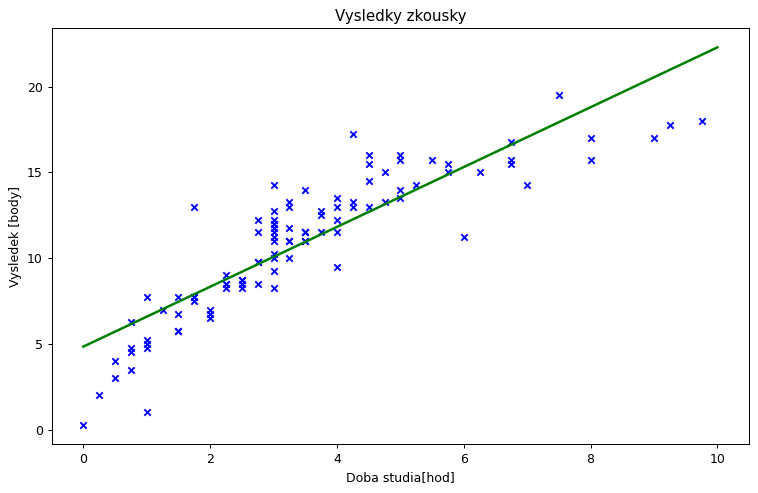

In [157]:
#vstupni paremetry do funkce usu.dra (theta, x a y) musi byt typu np.array nikoli matrix

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta)

Určete předpokládaný zisk bodů v případě přípravy v délce 4 hodin:

x : 4.000, y : 11.824


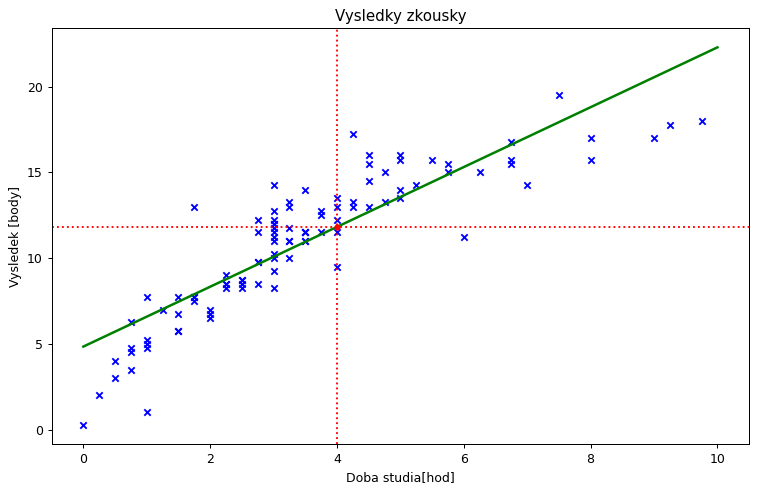

In [158]:
#################################################################
# ZDE DOPLNIT

valueX = np.array([4])
X_tilde = np.array([1, valueX[0]])
valueY = X_tilde @ theta


usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)
#################################################################


Určete předpokládanou dobu studia v případě zisku 12 bodů:

x : 4.101, y : 12.000


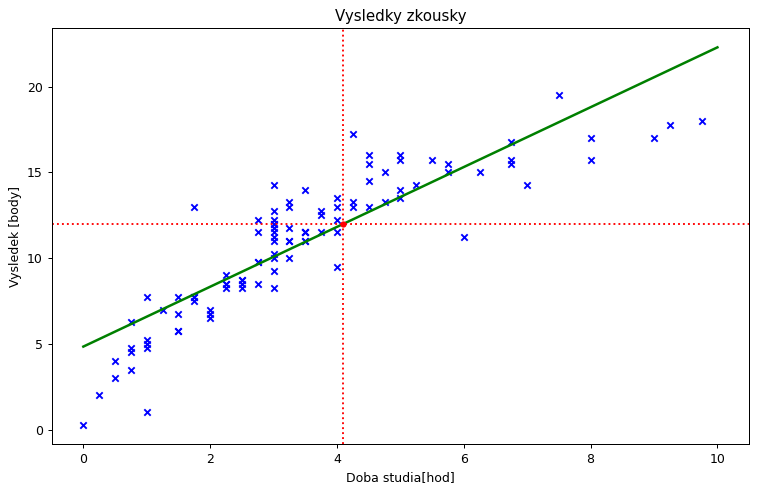

In [159]:
#################################################################
# ZDE DOPLNIT

valueY = np.array([12])
valueX = (valueY - theta[0]) / theta[1]

#################################################################

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)


### Polynomiální regrese

Určete předpokládaný zisk bodů v případě přípravy v délce 4 hodin, řádu polynomu 2 a 𝜆 1:

x : 4.000, y : 12.844


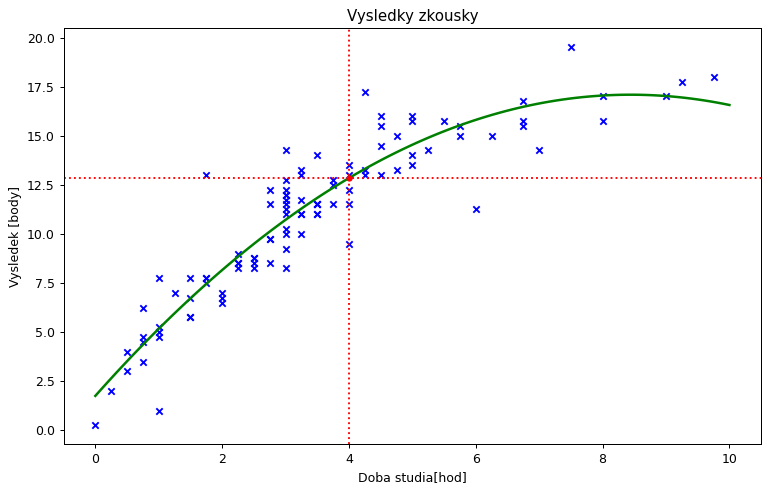

In [160]:
order = 2
lmbd = 1
theta = computeThetaLSE(x, y, order, lmbd)

#################################################################
# ZDE DOPLNIT

valueX = np.array([4])
X_tilde = np.array([1, valueX[0], valueX[0]**2])
valueY = X_tilde @ theta
# Nejvhodnejsi rad polynomu a proc: ...

#################################################################

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)


### Exponenciální regrese

Reší se jako lineární regrese pro data s hodnotami $[x,\log{(y)}]$

In [161]:
npzfile = np.load('data_02_exp.npz')
npzfile.files

['x0', 'x1']

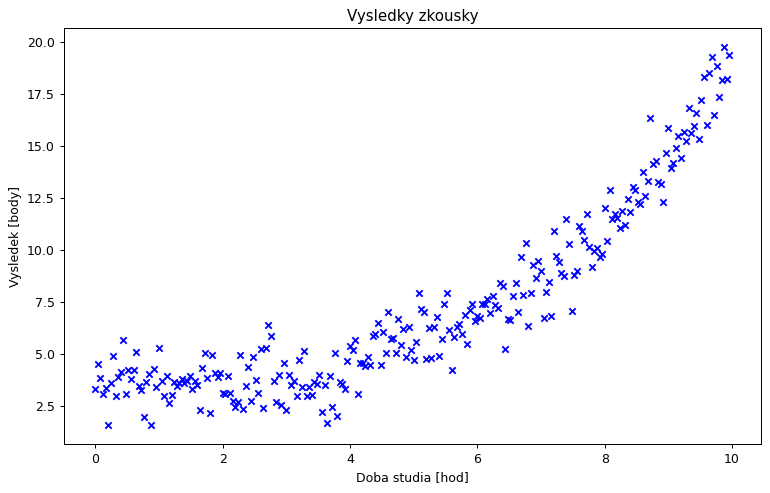

In [162]:
x_exp = npzfile['x0']
y_exp = npzfile['x1']
usu.draw(x_exp, y_exp, "Vysledky zkousky", "Doba studia [hod]", "Vysledek [body]")


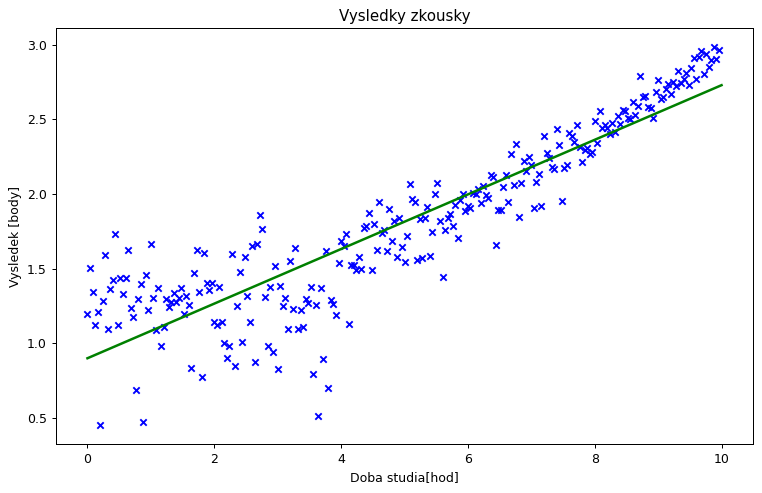

In [163]:
#################################################################
# ZDE DOPLNIT

theta = computeThetaLSE(x_exp, np.log(y_exp), order=1, lmbd=0)

usu.draw(x_exp, np.log(y_exp), "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta)

#################################################################


Určete předpokládaný zisk bodů v případě přípravy v délce 4 hodin:

In [166]:
#################################################################
# ZDE DOPLNIT

valueX = np.array([4])
X_tilde = np.array([1, valueX[0]])
log_valueY = X_tilde @ theta
valueY = np.exp(log_valueY) 
print(f"Doba: {valueX[0]} h")
print(f"Předpokládaný zisk: {valueY:.2f}")
#usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)

#################################################################


Doba: 4 h
Předpokládaný zisk: 5.11
